# **Cars4U - Project**
###Problem Statement
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

##Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

##Key Questions
* What are the key factors influencing the prices of cars?
* Is there a good predictive model for the Prices? 
* What does the performance assessment look like for such a model?

 
##Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

###Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

# **Import necessary libraries**

In [160]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Loading and Exploring dataset**

In [4]:
# loading the dataset
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [5]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 13 columns.


There are 13 columns and 7253 records in the dataset

In [6]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

In [7]:
# checking shape of the data for the dataset we will use henceforth
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 13 columns.


In [8]:
#checking for duplicate values in the data
data.duplicated().sum()

1

There is only one duplicate in the dataset

In [9]:
# showing the duplicated row in the dataset
data.loc[data.duplicated(), :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


The output above shows the row that is duplicated in the dataset

In [10]:
#dropping the duplicate row and removing duplicates from the original DataFrame using inplace=True
data.drop_duplicates (inplace=True)

In [11]:
# checking shape of the data for the dataset after applying the drop feature above
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 13 columns.


After dropping the duplicating row, we now have 7252 records and 13 columns

In [12]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.2+ KB


* Dependent variable is the price of the car, which is of float64 datatype. Seats is also a float datatype.

* Year and Kilometers_Driven are intergers

* The rest of the variables are of object type

* There are columns or variables with missing values, they are Mileage, Engine, Power, Seats, New_Price and Price 

* We will need to extract features from Engine, Power and Mileage so as to  model our data

In [13]:
# getting the summary statistics of the dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7206,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7077,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can see that the price range between 0.44 to 160, with 50% of the cars costing less than 5.64, while 75% cost less than 9.95 Lakh. This shows there is a high skewness of the data to the left

* In regards to kilometers driven, the data shows that the least kms is 171km while the highest is 6,500,000 milion Kilometers. This is way high a figure, we may need to check on this to validate the data. 50% of the cars had less than 55,000kms. This rcolumn is equally skewed to the left and we will need to validate.

* Seats per the cars range between 0 and 10. It would be impractical to have a car without a seat. We will need to check on the data here as well, probably based on the car name and Year of production. 

* The cars were manufactured between 1996 and 2019. This seems like correct data. 

* The rest of the columns do not have their summary statistics as they appear as objects. we will conduct feature engineering for columns like Power, Engine, and Mileage. The rest will remain as objects.

In [14]:
# checking for missing values in the data
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6246
Price                1233
dtype: int64

* Six of the rows have at least one missing value. New Price has the highest 
missing values in the dataset with 6246 records, followed by Price with 1233, and then, Power (175), Engine (46). Mileage column only misses 2 values. At this point we will need to determine whether to drop the row where missing value is mileage, as it may be insignificant in the analysis.

* The number of rows where mileage is null are 2 out of 7252, this is 0.02% which is less than 0.05%. This thus qualifies to be dropped.

* The number on missing values under the New_Price Column are 6146 out of the the 7252 records. This translates to over 80% of the data is missing. With this information we cannot impute for the missing values as there is a huge amount of data missing. As such we will drop this colum.

In [15]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [16]:
# we will skip the Name, Location, Mileage, Engine, Power and New Price columns as they will have a lot of unique values
cat_col = ['Fuel_Type', 'Transmission', 'Owner_Type',]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       5203
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
First             5951
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------


* Most of the cars in the dataset are either Dieasel or Petrol, few are electric, CNG and LPG
* Most of the cars are first owner or 2nd
* Cars are either automatic or Manual

**Dropping columns that do not add value to our dataset**

In [17]:
data.drop(['Name', 'Location'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7252 non-null   int64  
 1   Kilometers_Driven  7252 non-null   int64  
 2   Fuel_Type          7252 non-null   object 
 3   Transmission       7252 non-null   object 
 4   Owner_Type         7252 non-null   object 
 5   Mileage            7250 non-null   object 
 6   Engine             7206 non-null   object 
 7   Power              7077 non-null   object 
 8   Seats              7199 non-null   float64
 9   New_Price          1006 non-null   object 
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 679.9+ KB


After droping name and location we now have seven columns

# **Univariate Analysis**

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Price (target variable)

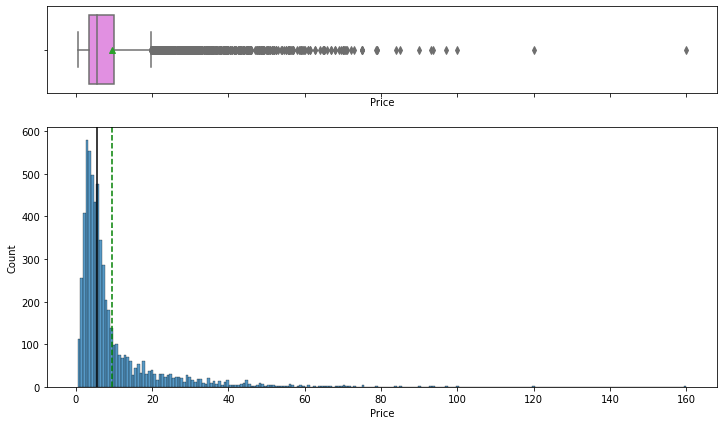

In [20]:
histogram_boxplot(data, "Price")

* The Price column of the cars are skewed to the right. There are outliers as shown in ghe box plot.

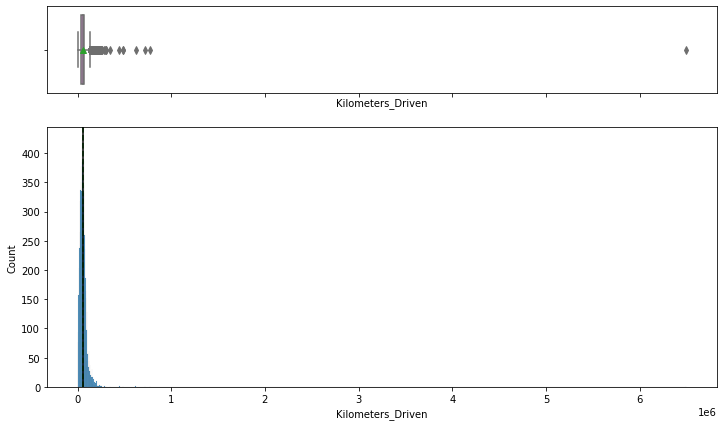

In [21]:
histogram_boxplot(data, "Kilometers_Driven")

In [22]:
# finding the record with more than the 3rd quantile, 73,000kms...
data.loc[data['Kilometers_Driven']>1000000,'Year'].value_counts()

2017    1
Name: Year, dtype: int64

In [25]:
data.loc[data['Kilometers_Driven']>1000000,'Power'].value_counts()

258 bhp    1
Name: Power, dtype: int64

The Kiloemeters column of the cars are skewed to the right. There are outliers as shown in the box plot, with one car having driven over 6.5 million kilometers driven. The car was manufactured in 2017, and by 2019, i.e 3 years, assuming it was manufactured in Januarry and the data extracted in December 2019, it had been driven 6.5 million kilometers, translating to 5,936 kilometers every day. This is an outlier and represents less than 0.05% of the data, as such I would drop it from the dataset. 

In [26]:
data.loc[data['Kilometers_Driven']> 1000000]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,
2328,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0


In [27]:
# adding the index value of the row in data.drop() function
data = data.drop(2328).reset_index(drop=True)

In [28]:
# checking shape of the data for the dataset after applying the drop feature above
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7251 rows and 11 columns.


In [32]:
# showing rows with missing mileage values
nan_mileage_col  = data[data['Mileage'].isnull()]
print(nan_mileage_col)

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage  \
4445  2016              50000  Electric    Automatic      First     NaN   
4903  2011              44000  Electric    Automatic      First     NaN   

       Engine   Power  Seats   New_Price  Price  
4445    72 CC  41 bhp    5.0  13.58 Lakh  13.00  
4903  1798 CC  73 bhp    5.0         NaN  12.75  


In [33]:
#dropping the two rows with missing values in the mileage column
data.dropna(subset=['Mileage'],inplace=True)

In [34]:
# checking shape of the data for the dataset after droping the two rows with missing mileage
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7249 rows and 11 columns.


In [35]:
# dropping New_Price column
# this column has over 80% of its records missing data. As such we cannot impute for the missing values
data.drop(['New_Price'],axis=1,inplace=True)

In [36]:
# checking shape of the data for the dataset after droping the New_Price column
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7249 rows and 10 columns.


In [77]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Fuel Type**

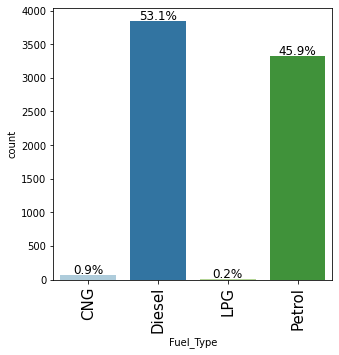

In [78]:
labeled_barplot(data, "Fuel_Type", perc=True)

there are more Diesel type of cars followed by those that use petrol

**Transmission**

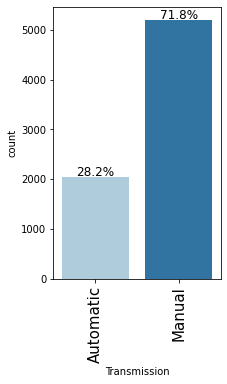

In [79]:
labeled_barplot(data, "Transmission", perc=True)

There are more manual cars than automatic

**Owner_Type**

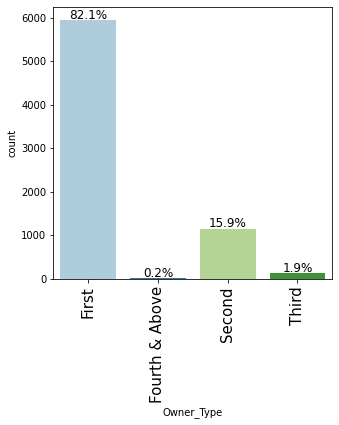

In [80]:
labeled_barplot(data, "Owner_Type", perc=True)

Most cars are 1st time owners followed by the 2nd owners

# **Bivariate Analysis**

**Plot the correlation heatmap and list your observations.**

In [37]:
# creating a list of non-tag columns
corr_cols = [item for item in data.columns if "tag" not in item]
print(corr_cols)

['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


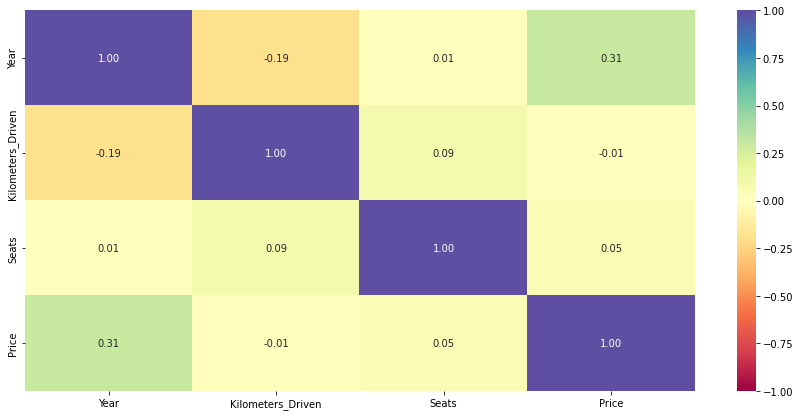

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Year and Price have a positive relationship.

* In this bivariate analysis, the variables are few and require that the data preprosessing be conducted first.

# **Data Pre-processing**

## Feature Extraction 
Looking at the dataset, Mileage, Power, Engine, and New_Price have been indicated as objects. We will need to extract features from the columns so that we will be able to impute when populating the rows with missing values in these columns 

**Engine**

In [39]:
Engine_size = data["Engine"].str.split(" ", n = 1, expand = True) 
Engine_size.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [40]:
data.drop(['Engine'], axis=1, inplace=True)
data["Engine_Size"]= Engine_size[0]   
data["Engine_CC"]= Engine_size[1]

del Engine_size  # don't need to do this but can keep things tidy

In [41]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Engine_Size,Engine_CC
0,2010,72000,CNG,Manual,First,26.6 km/kg,58.16 bhp,5.0,1.75,998,CC
1,2015,41000,Diesel,Manual,First,19.67 kmpl,126.2 bhp,5.0,12.50,1582,CC


We now have two columns with the Engine Size and the Engine CC, we have droped the Engine column. 

In [42]:
data.Engine_CC.unique()

array(['CC', nan], dtype=object)

Under this column we have only CC and nan, as such this column won't add any value to our analysis as we will have CC for all teh cars, if we replace with the mode. We will go ahead and drop the Engine_CC coumn

In [43]:
#dropping the Engine_CC column
data.drop(["Engine_CC"], axis=1, inplace=True)

In [367]:
data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Engine_Size
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,58.16 bhp,5.0,1.75,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,126.2 bhp,5.0,12.50,1582


the above shows that the Engine_CC column has been successfully dropped

**Power**

In [44]:
#extracting features from Power column
pwr = data["Power"].str.split(" ", n = 1, expand = True) 
pwr.head()

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp


In [45]:
data.drop(['Power'], axis=1, inplace=True)
data["Power_No"]= pwr[0]   
data["Power_bhp"]= pwr[1]

del pwr  # don't need to do this but can keep things tidy

In [46]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Engine_Size,Power_No,Power_bhp
0,2010,72000,CNG,Manual,First,26.6 km/kg,5.0,1.75,998,58.16,bhp
1,2015,41000,Diesel,Manual,First,19.67 kmpl,5.0,12.50,1582,126.2,bhp


In [47]:
data.Power_bhp.unique()

array(['bhp', nan], dtype=object)

Under the Power_bhp column we have only bhp and nan, as such this column won't add any value to our analysis as we will have bhp for all the cars, if we replace with the mode. We will go ahead and drop the Power_bhp coumn

In [48]:
#dropping the Power_CC column
data.drop(["Power_bhp"], axis=1, inplace=True)

In [49]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Engine_Size,Power_No
0,2010,72000,CNG,Manual,First,26.6 km/kg,5.0,1.75,998,58.16
1,2015,41000,Diesel,Manual,First,19.67 kmpl,5.0,12.50,1582,126.2


**Mileage**

In [50]:
#extracting features from Power column
miles = data["Mileage"].str.split(" ", n = 1, expand = True) 
miles.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [51]:
data.drop(['Mileage'], axis=1, inplace=True)
data["Milleage"]= miles[0]   
data["Mil_Unit"]= miles[1]

del miles  # don't need to do this but can keep things tidy

In [52]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine_Size,Power_No,Milleage,Mil_Unit
0,2010,72000,CNG,Manual,First,5.0,1.75,998,58.16,26.6,km/kg
1,2015,41000,Diesel,Manual,First,5.0,12.50,1582,126.2,19.67,kmpl


In [53]:
#dropping the Mil_Unit column, this column has units that can be stripped off and numericals used as they are, given that both kmpl and km/kg refer to a unit of fuel used per kilometer
data.drop(["Mil_Unit"], axis=1, inplace=True)

In [54]:
data.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine_Size,Power_No,Milleage
0,2010,72000,CNG,Manual,First,5.0,1.75,998,58.16,26.6
1,2015,41000,Diesel,Manual,First,5.0,12.50,1582,126.2,19.67


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7249 non-null   int64  
 1   Kilometers_Driven  7249 non-null   int64  
 2   Fuel_Type          7249 non-null   object 
 3   Transmission       7249 non-null   object 
 4   Owner_Type         7249 non-null   object 
 5   Seats              7196 non-null   float64
 6   Price              6016 non-null   float64
 7   Engine_Size        7203 non-null   object 
 8   Power_No           7074 non-null   object 
 9   Milleage           7249 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 623.0+ KB


**Change the data types for the Milleage, Engine Size and Power Columns**

In [56]:
data['Milleage'] = data['Milleage'].astype(float, errors = 'raise')

In [57]:
data['Power_No'] = data['Power_No'].astype(float, errors = 'raise')

In [58]:
data['Engine_Size'] = data['Engine_Size'].astype(float, errors = 'raise')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7249 non-null   int64  
 1   Kilometers_Driven  7249 non-null   int64  
 2   Fuel_Type          7249 non-null   object 
 3   Transmission       7249 non-null   object 
 4   Owner_Type         7249 non-null   object 
 5   Seats              7196 non-null   float64
 6   Price              6016 non-null   float64
 7   Engine_Size        7203 non-null   float64
 8   Power_No           7074 non-null   float64
 9   Milleage           7249 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 623.0+ KB


## Handling missing values

**Power column and missing values**

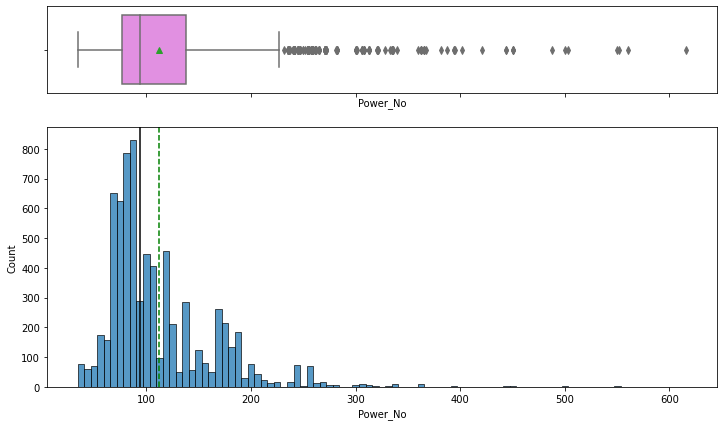

In [81]:
histogram_boxplot(data, "Power_No")

* The Power column has data that is skewed to the right, with outliers

In [82]:
# imputing missing values in Power_No column with median
data['Power_No'] = data['Power_No'].fillna(data['Power_No'].median())

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7249 non-null   int64  
 1   Kilometers_Driven  7249 non-null   int64  
 2   Fuel_Type          7249 non-null   object 
 3   Transmission       7249 non-null   object 
 4   Owner_Type         7249 non-null   object 
 5   Seats              7249 non-null   float64
 6   Price              6016 non-null   float64
 7   Engine_Size        7249 non-null   float64
 8   Power_No           7249 non-null   float64
 9   Milleage           7249 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 881.0+ KB


**Engine Size column and missing values**

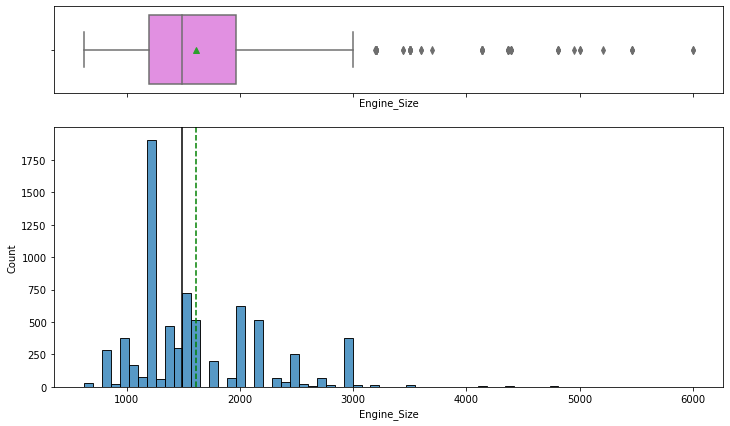

In [84]:
histogram_boxplot(data, "Engine_Size")

* The Engine size column has data that is skewed to the right, with outliers

In [85]:
# imputing missing values in Power_No column with median
data['Engine_Size'] = data['Engine_Size'].fillna(data['Engine_Size'].median())

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7249 non-null   int64  
 1   Kilometers_Driven  7249 non-null   int64  
 2   Fuel_Type          7249 non-null   object 
 3   Transmission       7249 non-null   object 
 4   Owner_Type         7249 non-null   object 
 5   Seats              7249 non-null   float64
 6   Price              6016 non-null   float64
 7   Engine_Size        7249 non-null   float64
 8   Power_No           7249 non-null   float64
 9   Milleage           7249 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 881.0+ KB


**Seats column and missing values**

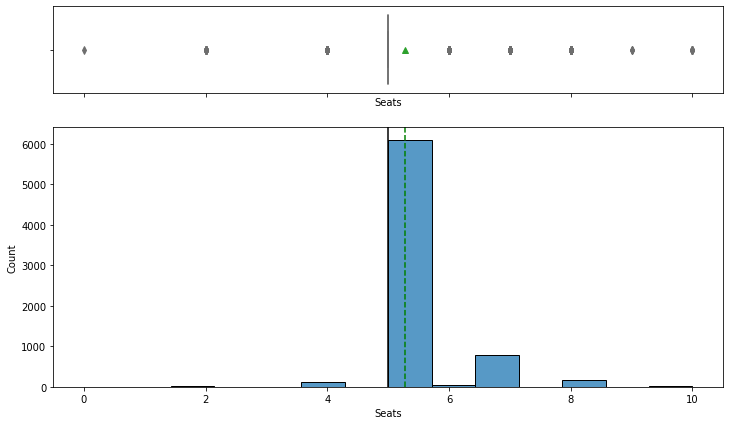

In [87]:
histogram_boxplot(data, "Seats")

In [88]:
# imputing missing values in Seats column with mean, the data is almost symmetrical
data['Seats'] = data['Seats'].fillna(data['Seats'].mean())

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7249 non-null   int64  
 1   Kilometers_Driven  7249 non-null   int64  
 2   Fuel_Type          7249 non-null   object 
 3   Transmission       7249 non-null   object 
 4   Owner_Type         7249 non-null   object 
 5   Seats              7249 non-null   float64
 6   Price              6016 non-null   float64
 7   Engine_Size        7249 non-null   float64
 8   Power_No           7249 non-null   float64
 9   Milleage           7249 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 881.0+ KB


## Handling Outliers

**Making categoricals into categorical types**

In [115]:
cat_vars = ['Fuel_Type', 'Transmission', 'Owner_Type']
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    data[colname] = data[colname].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7249 non-null   int64   
 1   Kilometers_Driven  7249 non-null   int64   
 2   Fuel_Type          7249 non-null   category
 3   Transmission       7249 non-null   category
 4   Owner_Type         7249 non-null   category
 5   Seats              7249 non-null   float64 
 6   Price              6016 non-null   float64 
 7   Engine_Size        7249 non-null   float64 
 8   Power_No           7249 non-null   float64 
 9   Milleage           7249 non-null   float64 
dtypes: category(3), float64(5), int64(2)
memory usage: 732.9 KB


**Outlier detection using IQR**

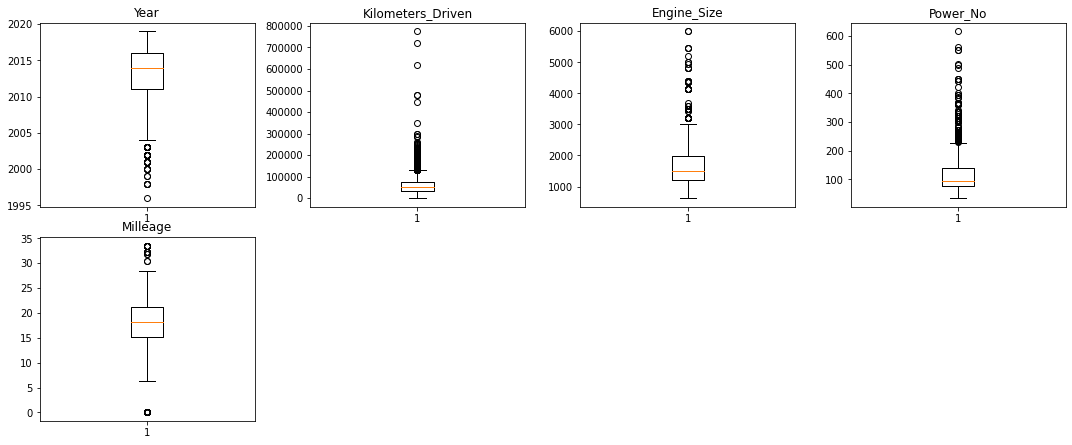

In [119]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Year', 'Kilometers_Driven', 'Engine_Size', 'Power_No','Milleage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [134]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [135]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

Year                 0.800110
Kilometers_Driven    3.545317
Engine_Size          0.896675
Power_No             3.766037
Milleage             1.365706
dtype: float64

**Creating a function to floor and cap/clip outliers in a column**

In [136]:
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    data: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    data[col] = np.clip(data[col], lower_whisker, upper_whisker)

    return data

**Treating outlier Kms Driven**

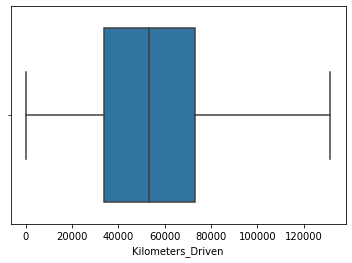

In [137]:
data = treat_outliers(data,'Kilometers_Driven')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Kilometers_Driven')
plt.show()

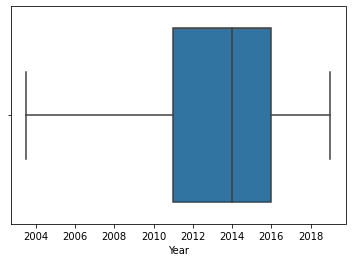

In [138]:
# treating outliears in Year column
data = treat_outliers(data,'Year')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Year')
plt.show()

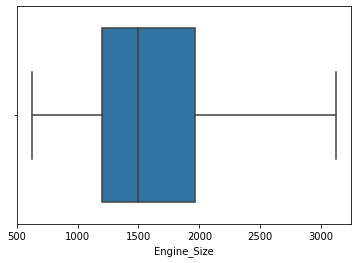

In [139]:
# treating outliears in Engine column
data = treat_outliers(data,'Engine_Size')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Engine_Size')
plt.show()

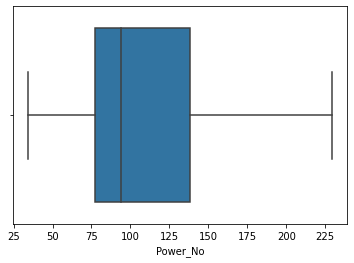

In [140]:
# treating outliears in Power column
data = treat_outliers(data,'Power_No')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Power_No')
plt.show()

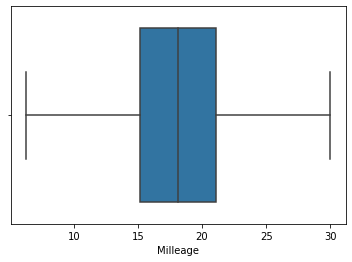

In [141]:
# treating outliears in Milleage column
data = treat_outliers(data,'Milleage')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Milleage')
plt.show()

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7249 non-null   float64 
 1   Kilometers_Driven  7249 non-null   float64 
 2   Fuel_Type          7249 non-null   category
 3   Transmission       7249 non-null   category
 4   Owner_Type         7249 non-null   category
 5   Seats              7249 non-null   float64 
 6   Price              6016 non-null   float64 
 7   Engine_Size        7249 non-null   float64 
 8   Power_No           7249 non-null   float64 
 9   Milleage           7249 non-null   float64 
dtypes: category(3), float64(7)
memory usage: 732.9 KB


**Setting the data type to integer for 'Kilometers_Driven', 'Engine_Size', 'Power_No', and 'Milleage'**

In [174]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(int)

In [175]:
data['Engine_Size'] = data['Engine_Size'].astype(int)

In [176]:
data['Power_No'] = data['Power_No'].astype(int)

In [177]:
data['Milleage'] = data['Milleage'].astype(int)

In [186]:
data['Year'] = data['Year'].astype(int)

In [187]:
data['Seats'] = data['Seats'].astype(int)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7249 entries, 0 to 7250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               7249 non-null   float64 
 1   Kilometers_Driven  7249 non-null   int64   
 2   Fuel_Type          7249 non-null   category
 3   Transmission       7249 non-null   category
 4   Owner_Type         7249 non-null   category
 5   Seats              7249 non-null   float64 
 6   Price              6016 non-null   float64 
 7   Engine_Size        7249 non-null   int64   
 8   Power_No           7249 non-null   int64   
 9   Milleage           7249 non-null   int64   
dtypes: category(3), float64(3), int64(4)
memory usage: 732.9 KB


In [196]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Price,1233,17.009243


In [197]:
# droping rows with null values of Price
df1 = data.dropna()

In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6017
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               6016 non-null   int64   
 1   Kilometers_Driven  6016 non-null   int64   
 2   Fuel_Type          6016 non-null   category
 3   Transmission       6016 non-null   category
 4   Owner_Type         6016 non-null   category
 5   Seats              6016 non-null   int64   
 6   Price              6016 non-null   float64 
 7   Engine_Size        6016 non-null   int64   
 8   Power_No           6016 non-null   int64   
 9   Milleage           6016 non-null   int64   
dtypes: category(3), float64(1), int64(6)
memory usage: 394.2 KB


# **Model Building (sklearn)**

**Define independent and dependent variables**

In [203]:
X = df1.drop(["Price"], axis=1)
y = df1["Price"]

In [204]:
X.shape

(6016, 9)

In [205]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Year,Kilometers_Driven,Seats,Engine_Size,Power_No,Milleage,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5,998,58,26,0,0,0,0,1,0,0,0
1,2015,41000,5,1582,126,19,1,0,0,0,1,0,0,0
2,2011,46000,5,1199,88,18,0,0,0,1,1,0,0,0
3,2012,87000,7,1248,88,20,1,0,0,0,1,0,0,0
4,2013,40670,5,1968,140,15,1,0,0,0,0,0,1,0


In [206]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6017
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       6016 non-null   int64
 1   Kilometers_Driven          6016 non-null   int64
 2   Seats                      6016 non-null   int64
 3   Engine_Size                6016 non-null   int64
 4   Power_No                   6016 non-null   int64
 5   Milleage                   6016 non-null   int64
 6   Fuel_Type_Diesel           6016 non-null   uint8
 7   Fuel_Type_Electric         6016 non-null   uint8
 8   Fuel_Type_LPG              6016 non-null   uint8
 9   Fuel_Type_Petrol           6016 non-null   uint8
 10  Transmission_Manual        6016 non-null   uint8
 11  Owner_Type_Fourth & Above  6016 non-null   uint8
 12  Owner_Type_Second          6016 non-null   uint8
 13  Owner_Type_Third           6016 non-null   uint8
dtypes: int64(6), uint8(8)
me

# **Split the dataset**

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [207]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [208]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1805


# **Fitting a linear model**

In [209]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [211]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.855680
Kilometers_Driven,-0.000041
Seats,-1.853437
Engine_Size,0.006417
Power_No,0.119171
Milleage,0.020622
Fuel_Type_Diesel,-0.345042
Fuel_Type_Electric,-1.885927
Fuel_Type_LPG,2.090578
Fuel_Type_Petrol,-0.448045


**Coefficient Interpretations**
* Coefficients of Year, Engine, Power, Milleage and owner type 3rd, are positive. Increase in these will lead to an increase in the price of a car.
* Coefficients of Kms driven, seats, fuel types (diesel, electric, and petrol), Transmission_Manual etc are negative.Increase in these will lead to a decrease in the price of a car.

# **Model Perfomance Check**

In [212]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [214]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.598145,4.146602,0.664966,0.663848,83.114421


In [215]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.415582,4.015832,0.633928,0.631065,82.857802


**Observations**

* The train and test  R squared  are 0.66 and 0.63, indicating that the model explains 66% and 63% of the total variation in the train and test sets respectively. Also, both scores are comparable.

* RMSE values on the train and test sets are also comparable.

* This shows that the model is not overfitting.

* MAE indicates that our current model is able to predict car prices  within a mean error of 4.01 on the test set.

* MAPE of 82 on the test data means that we are able to predict within 82% of the car prices.

## Conclusions
* The predictive model built can be used to predict the car prices with an  R2  of 0.664 on the training set.
* Business owners can use this model to predict the anime ratings within a mean error of 4.01 on the test set.
* Other findings were that the logarithm of the Year, Engine, Power, Milleage are some of the factors which tend to increase the price of a car.
* Of note also is that Kms driven, seats, fuel types are some of the factors which tend to decrease the rating of an anime.
